In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import viz

import scipy
from scipy import stats
import sklearn.impute as simpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


import prepare
import explore

# Load the tips dataset.

Create a column named price_per_person. This should be the total bill divided by the party size.

In [2]:
df = sns.load_dataset("tips")
df["price_per_person"] = df["total_bill"]/df["size"]

dummy_df = pd.get_dummies(data=df[df.select_dtypes(include=['category']).columns.tolist()], drop_first=False)
dummy_df.drop(columns=["sex_Male","smoker_No","time_Lunch"],inplace=True)

df = df.drop(columns=(df.select_dtypes(include=['category']).columns.tolist()))
df = pd.concat([df,dummy_df],axis=1)

pred = "tip"
df

,total_bill,tip,size,price_per_person,sex_Female,smoker_Yes,day_Thur,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,8.495000,1,0,0,0,0,1,1
1,10.34,1.66,3,3.446667,0,0,0,0,0,1,1
2,21.01,3.50,3,7.003333,0,0,0,0,0,1,1
3,23.68,3.31,2,11.840000,0,0,0,0,0,1,1
4,24.59,3.61,4,6.147500,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,9.676667,0,0,0,0,1,0,1
240,27.18,2.00,2,13.590000,1,1,0,0,1,0,1
241,22.67,2.00,2,11.335000,0,1,0,0,1,0,1
242,17.82,1.75,2,8.910000,0,0,0,0,1,0,1


In [3]:
cat_col = ["size","sex_Female","smoker_Yes",'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun',
       'time_Dinner']
num_col = ["total_bill","price_per_person"]

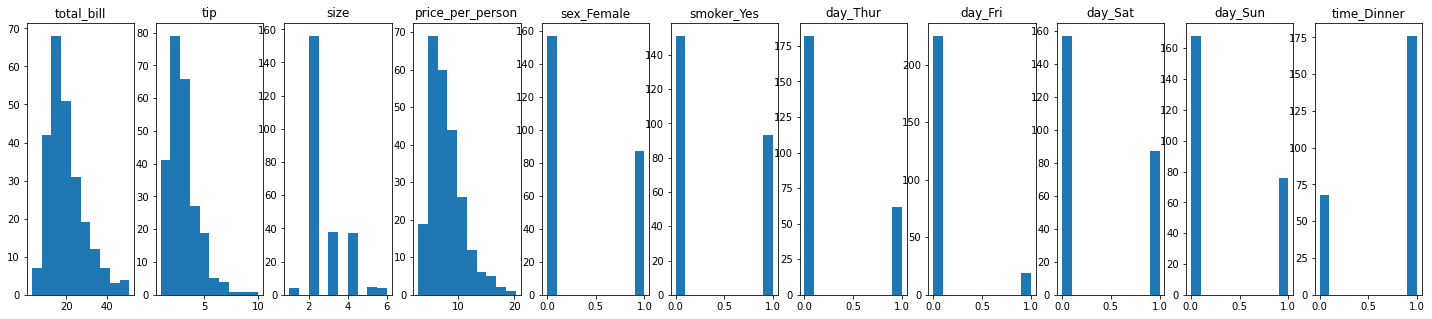

In [4]:
explore.univariate_explore(df)

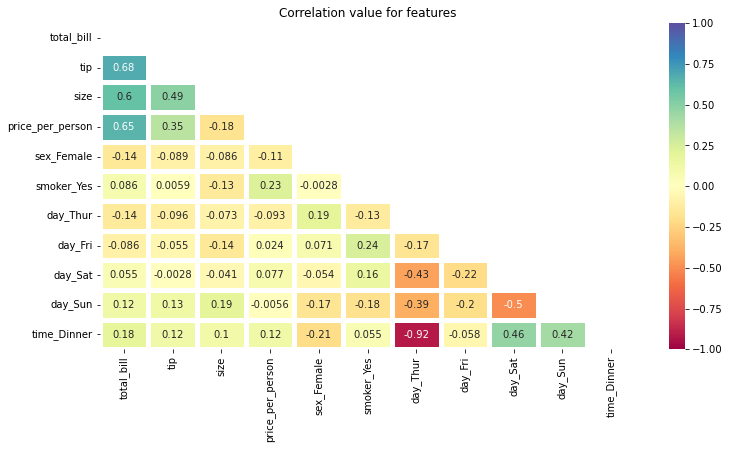

In [5]:
explore.heatmap_corr(df)

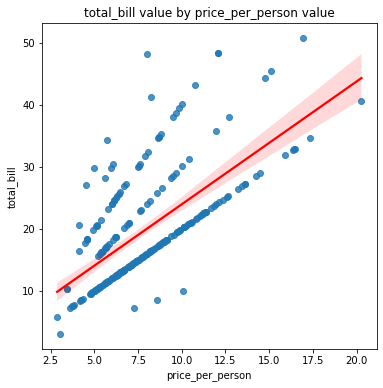

<Figure size 432x432 with 0 Axes>

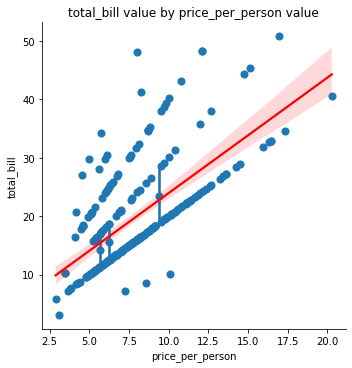

<Figure size 432x432 with 0 Axes>

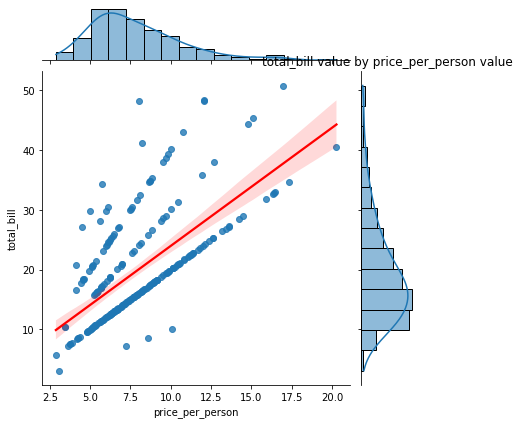

In [6]:
explore.plot_variable_pairs(df,num_col)

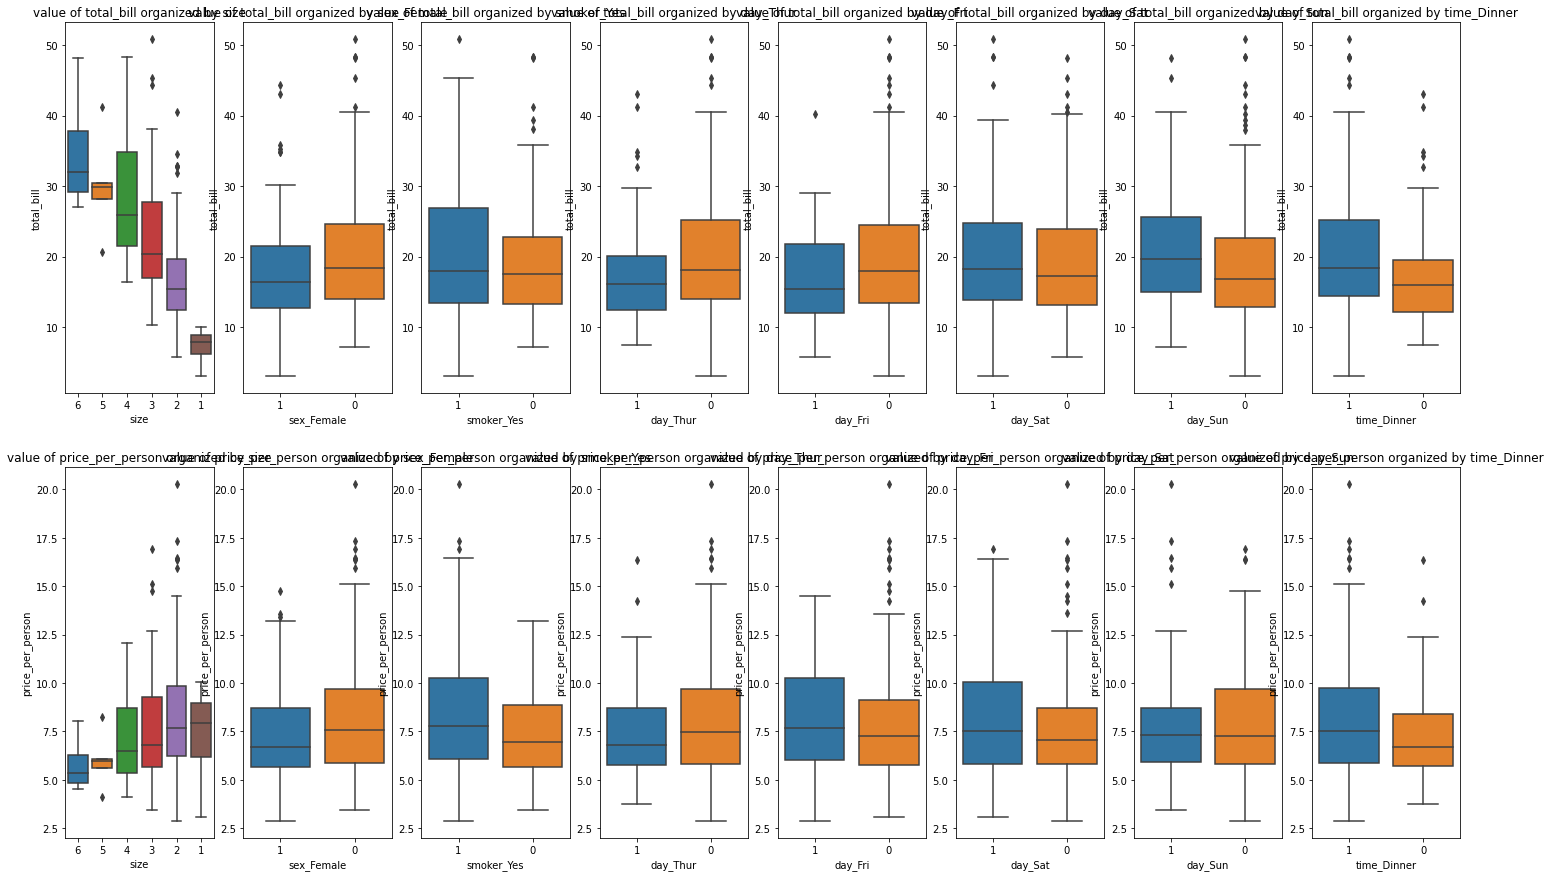

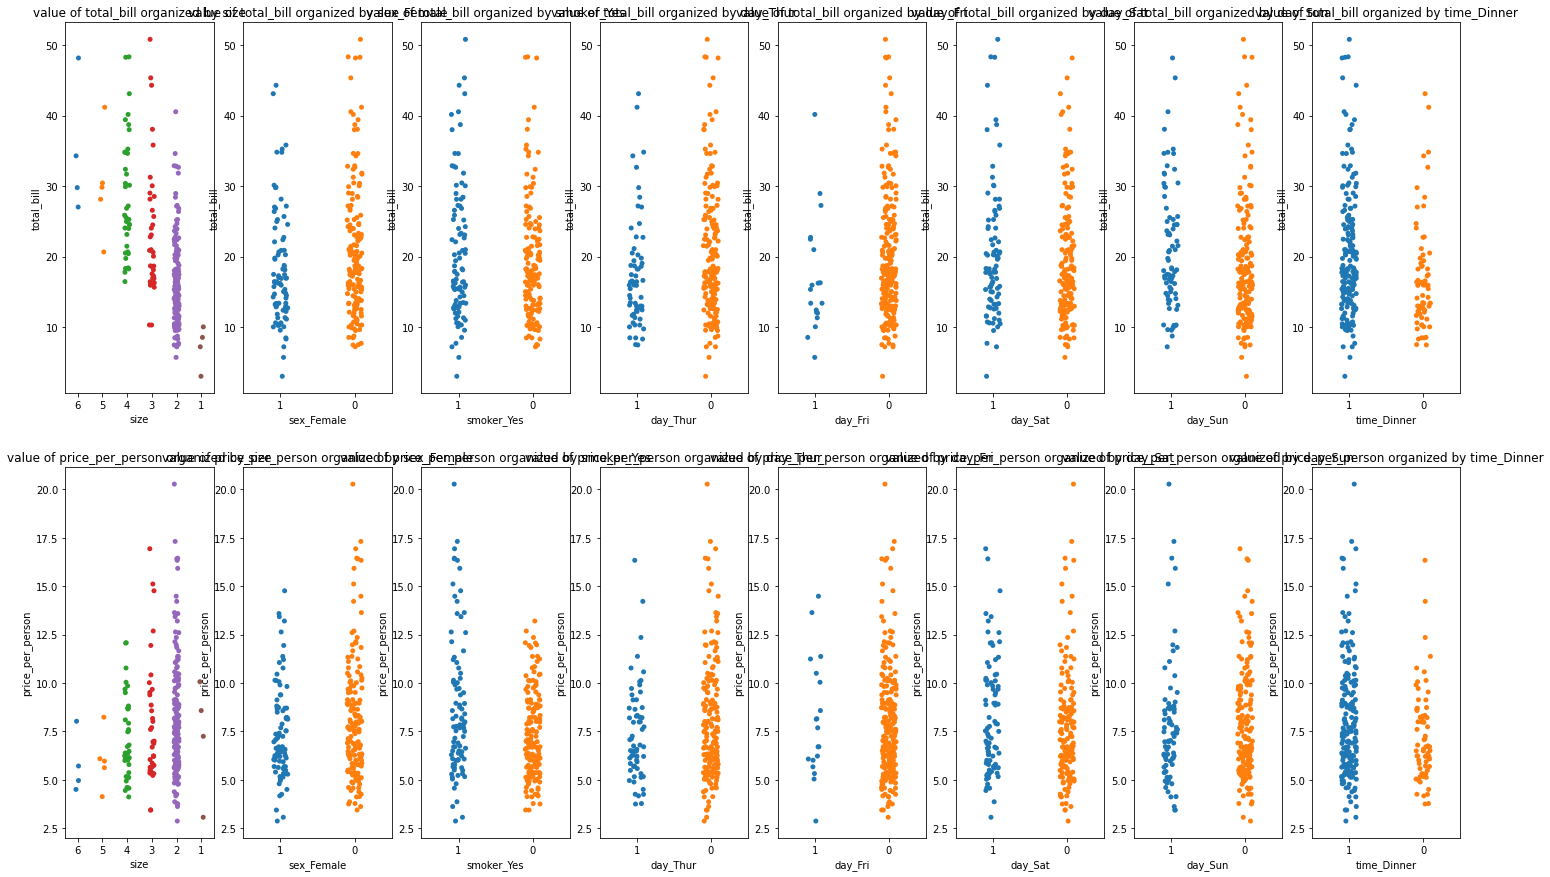

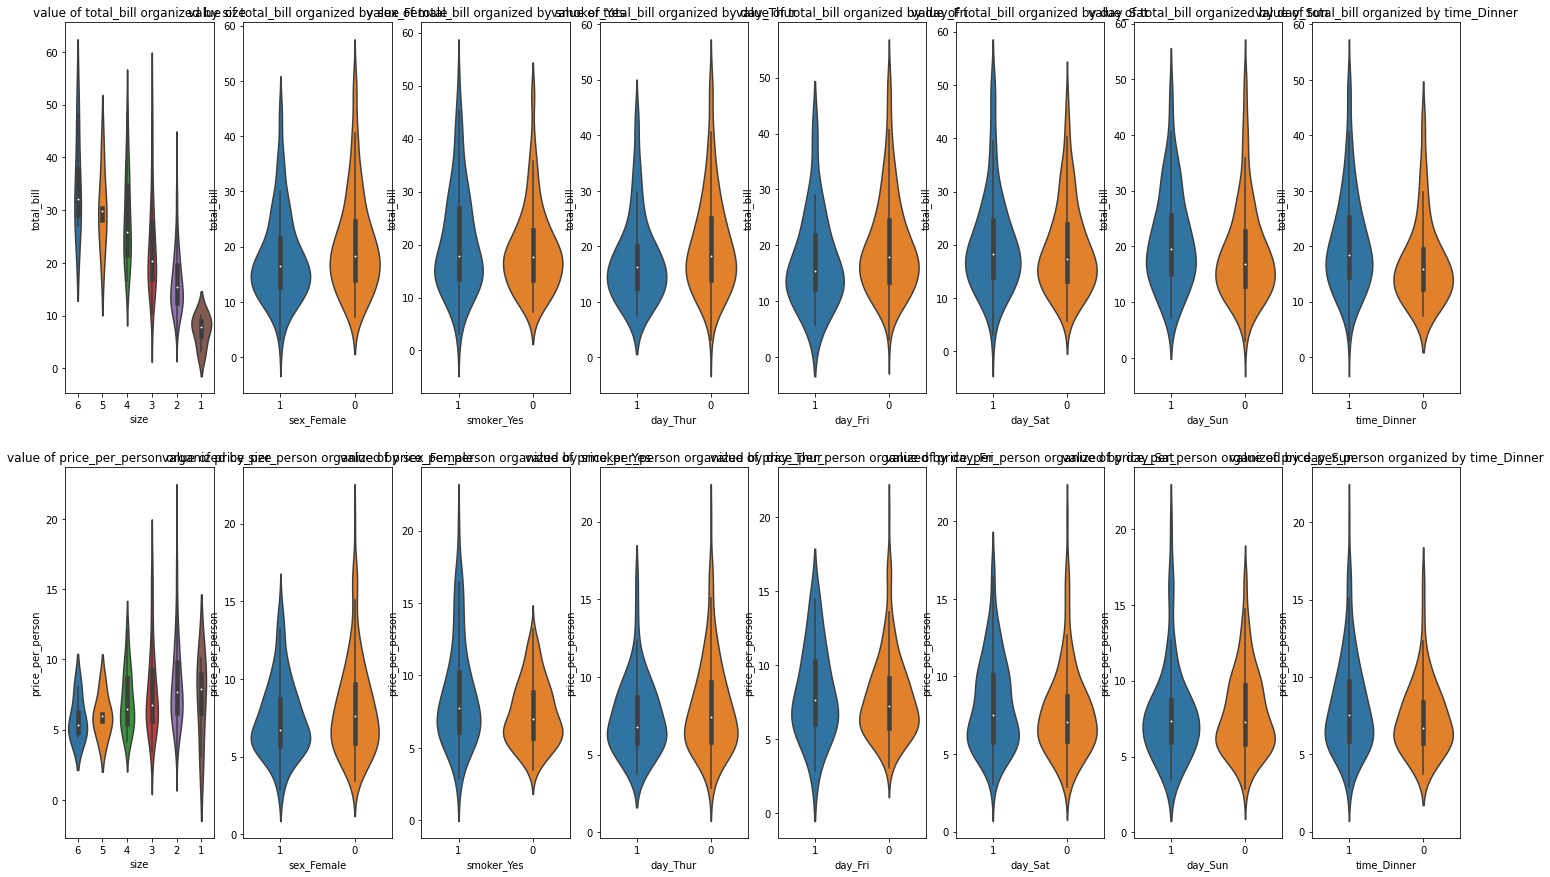

In [7]:
explore.plot_categorical_and_continuous_vars(df,num_col,cat_col)

-----------------------------
we can reject that there are equal variance in these two groups with 0.99 certainty Flag=F stat=6.49353, p=0.01161

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶s̶i̶z̶e̶3̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶s̶i̶z̶e̶2̶ ) t=4.26609, p=0.00010
-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=8.46298, p=0.00405

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶s̶i̶z̶e̶4̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶s̶i̶z̶e̶2̶ ) t=8.13375, p=0.00000
-----------------------------
we can accept that there are equal variance in these two groups with 0.92 certainty Flag=T stat=0.00963, p=0.92211

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶s̶i̶z̶e̶4̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶

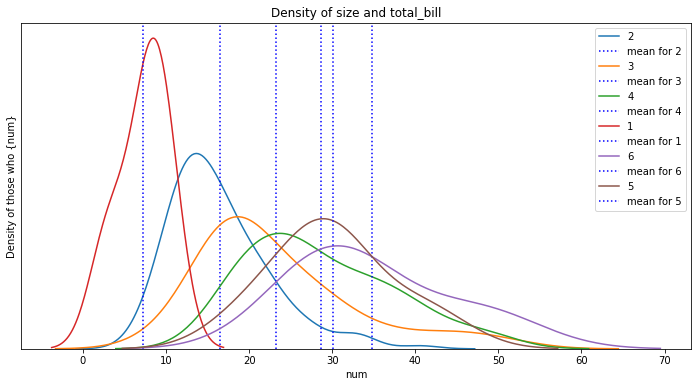

-----------------------------
we can accept that there are equal variance in these two groups with 0.2 certainty Flag=T stat=1.63172, p=0.20269

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶s̶e̶x̶_̶F̶e̶m̶a̶l̶e̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶s̶e̶x̶_̶F̶e̶m̶a̶l̶e̶1̶ ) t=2.27779, p=0.02361


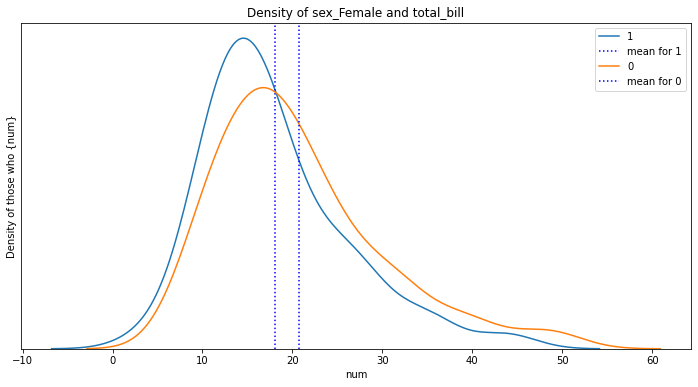

-----------------------------
we can reject that there are equal variance in these two groups with 0.95 certainty Flag=F stat=4.05373, p=0.04518

 We fail to reject the null hypothesis ( total_bill of smoker_Yes1 has identical average values to total_bill of other smoker_Yes0 ) t=1.28425, p=0.20081


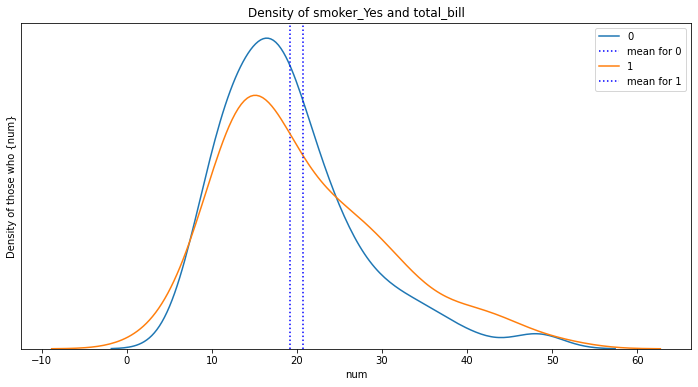

-----------------------------
we can accept that there are equal variance in these two groups with 0.18 certainty Flag=T stat=1.79130, p=0.18202

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶d̶a̶y̶_̶T̶h̶u̶r̶1̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶d̶a̶y̶_̶T̶h̶u̶r̶0̶ ) t=-2.17029, p=0.03096


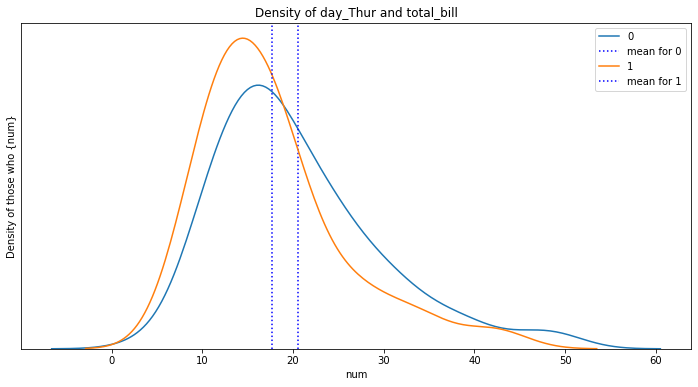

-----------------------------
we can accept that there are equal variance in these two groups with 0.62 certainty Flag=T stat=0.24481, p=0.62120

 We fail to reject the null hypothesis ( total_bill of day_Fri1 has identical average values to total_bill of other day_Fri0 ) t=-1.34546, p=0.17974


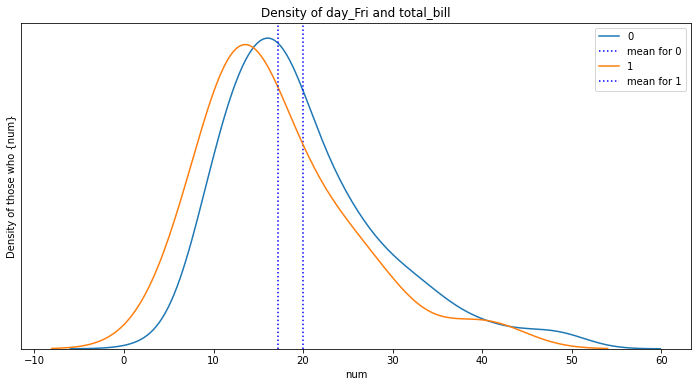

-----------------------------
we can accept that there are equal variance in these two groups with 0.7 certainty Flag=T stat=0.15087, p=0.69805

 We fail to reject the null hypothesis ( total_bill of day_Sat1 has identical average values to total_bill of other day_Sat0 ) t=0.85563, p=0.39305


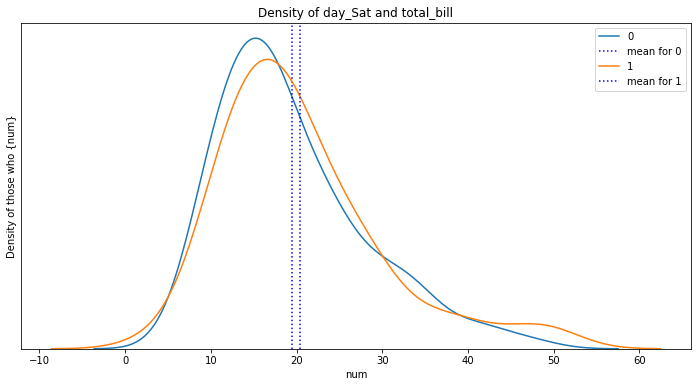

-----------------------------
we can accept that there are equal variance in these two groups with 0.55 certainty Flag=T stat=0.36530, p=0.54615

 We fail to reject the null hypothesis ( total_bill of day_Sun0 has identical average values to total_bill of other day_Sun1 ) t=-1.92732, p=0.05511


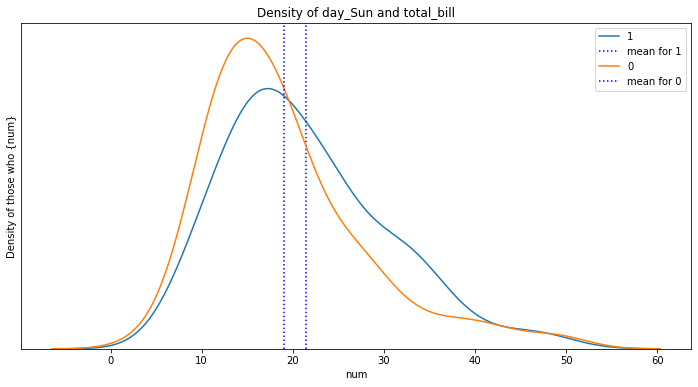

-----------------------------
we can accept that there are equal variance in these two groups with 0.1 certainty Flag=T stat=2.69070, p=0.10223

 We reject the null Hypothesis ( t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶t̶i̶m̶e̶_̶D̶i̶n̶n̶e̶r̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶o̶t̶a̶l̶_̶b̶i̶l̶l̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶t̶i̶m̶e̶_̶D̶i̶n̶n̶e̶r̶1̶ ) t=-2.89764, p=0.00410


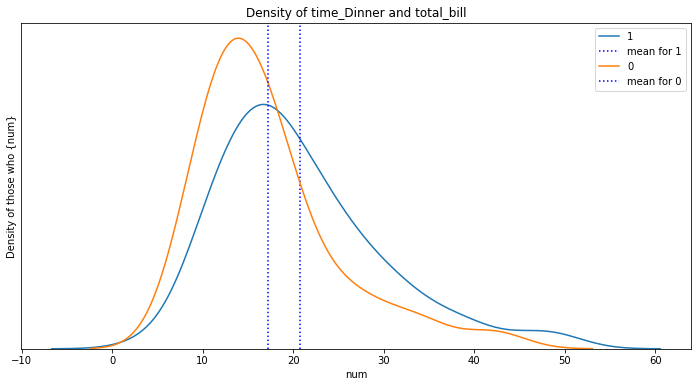

-----------------------------
we can accept that there are equal variance in these two groups with 0.97 certainty Flag=T stat=0.00104, p=0.97430

 We fail to reject the null hypothesis ( price_per_person of size3 has identical average values to price_per_person of other size2 ) t=-0.84402, p=0.39971
-----------------------------
we can accept that there are equal variance in these two groups with 0.13 certainty Flag=T stat=2.27097, p=0.13347

 We reject the null Hypothesis ( p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶s̶i̶z̶e̶4̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶s̶i̶z̶e̶2̶ ) t=-2.03430, p=0.04330
-----------------------------
we can accept that there are equal variance in these two groups with 0.25 certainty Flag=T stat=1.35895, p=0.24751

 We fail to reject the null hypothesis ( price_per_person of size4 has identical average values to price_per_person of other size3 ) t=-0.97300, p=0.33377
----------------

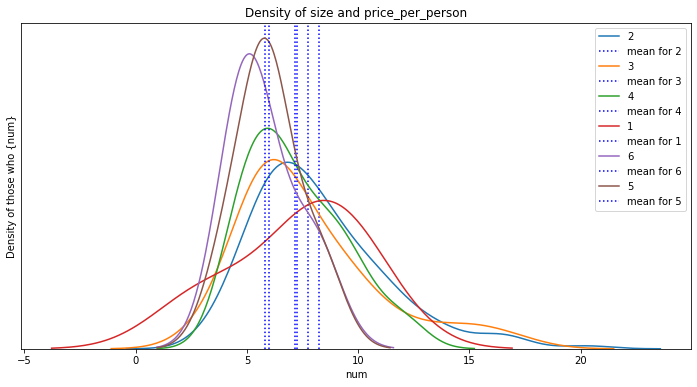

-----------------------------
we can accept that there are equal variance in these two groups with 0.11 certainty Flag=T stat=2.61440, p=0.10720

 We fail to reject the null hypothesis ( price_per_person of sex_Female0 has identical average values to price_per_person of other sex_Female1 ) t=1.69953, p=0.09050


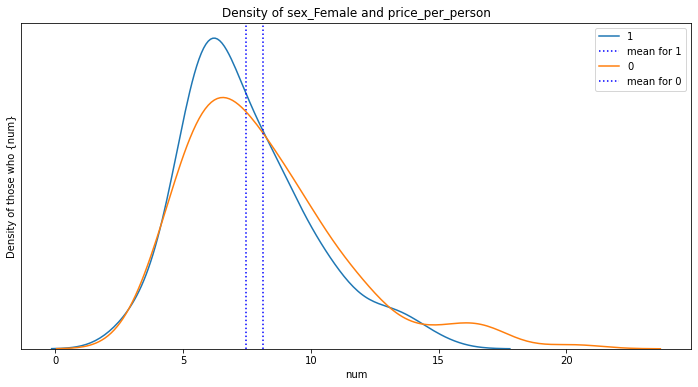

-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=13.07101, p=0.00036

 We reject the null Hypothesis ( p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶s̶m̶o̶k̶e̶r̶_̶Y̶e̶s̶1̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶s̶m̶o̶k̶e̶r̶_̶Y̶e̶s̶0̶ ) t=3.29810, p=0.00124


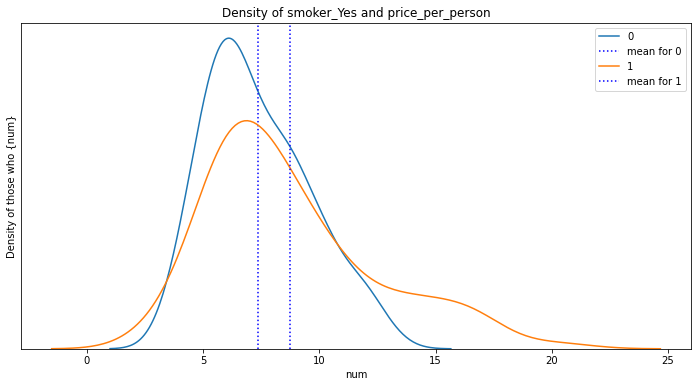

-----------------------------
we can accept that there are equal variance in these two groups with 0.14 certainty Flag=T stat=2.24623, p=0.13524

 We fail to reject the null hypothesis ( price_per_person of day_Thur1 has identical average values to price_per_person of other day_Thur0 ) t=-1.45760, p=0.14625


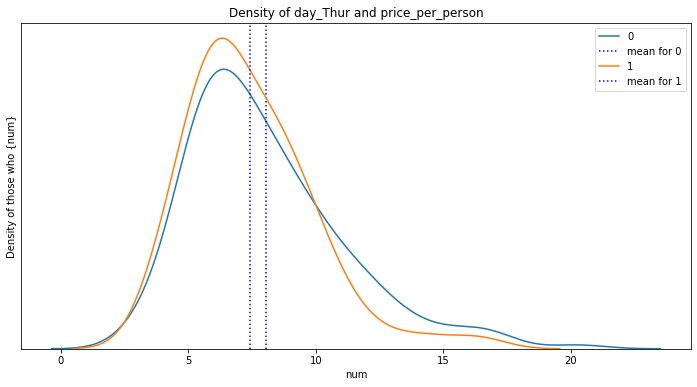

-----------------------------
we can accept that there are equal variance in these two groups with 0.65 certainty Flag=T stat=0.21179, p=0.64578

 We fail to reject the null hypothesis ( price_per_person of day_Fri1 has identical average values to price_per_person of other day_Fri0 ) t=0.38034, p=0.70403


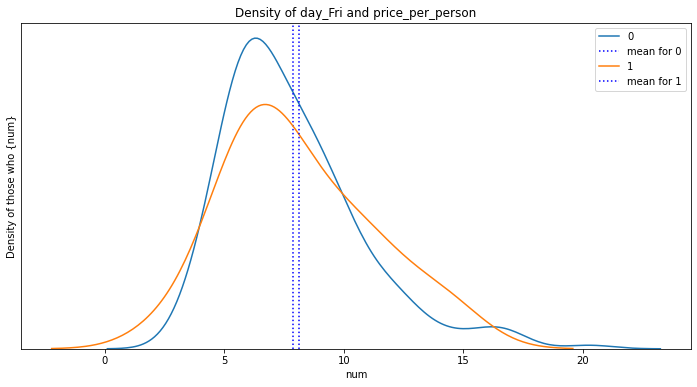

-----------------------------
we can accept that there are equal variance in these two groups with 0.36 certainty Flag=T stat=0.83316, p=0.36227

 We fail to reject the null hypothesis ( price_per_person of day_Sat1 has identical average values to price_per_person of other day_Sat0 ) t=1.19404, p=0.23363


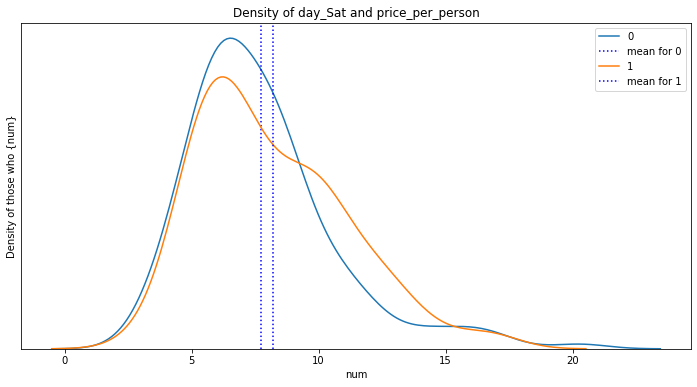

-----------------------------
we can accept that there are equal variance in these two groups with 0.95 certainty Flag=T stat=0.00374, p=0.95127

 We fail to reject the null hypothesis ( price_per_person of day_Sun0 has identical average values to price_per_person of other day_Sun1 ) t=0.08708, p=0.93068


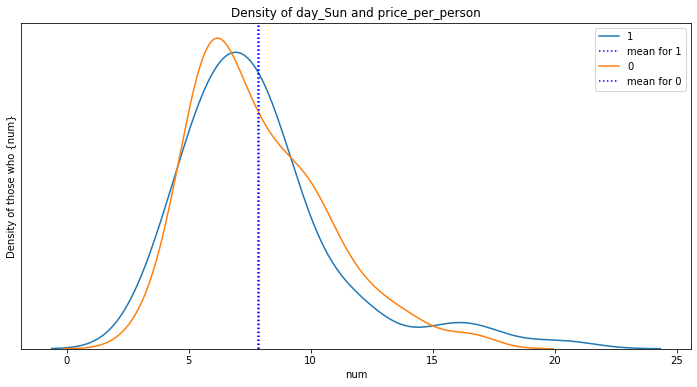

-----------------------------
we can reject that there are equal variance in these two groups with 0.96 certainty Flag=F stat=4.11473, p=0.04361

 We reject the null Hypothesis ( p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶t̶i̶m̶e̶_̶D̶i̶n̶n̶e̶r̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶p̶r̶i̶c̶e̶_̶p̶e̶r̶_̶p̶e̶r̶s̶o̶n̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶t̶i̶m̶e̶_̶D̶i̶n̶n̶e̶r̶1̶ ) t=-2.14872, p=0.03319


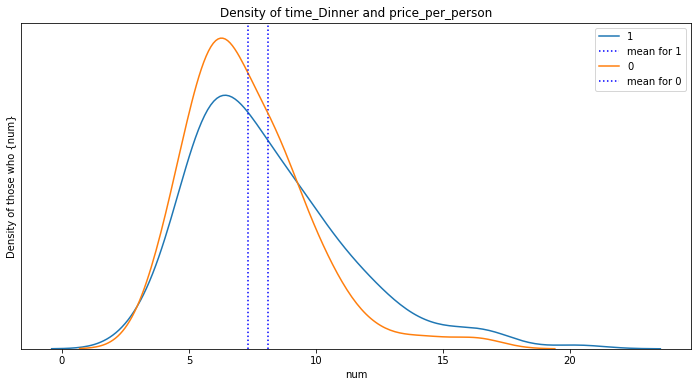

In [8]:
for num in num_col:
    for cat in cat_col:
        explore.cat_and_num_explore_plot(df,cat,num)

# Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?
total price

In [9]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size= .2, random_state=123)
train,validate = train_test_split(train,test_size= .25, random_state=123)

print(f"prepared df shape: {df.shape}")
print(f"train shape: {train.shape}")
print(f"validate shape: {validate.shape}")
print(f"test shape: {test.shape}")

not_pred=df.columns.drop(pred).tolist()


X_train,y_train = train[not_pred],train[pred]
X_validate,y_validate = validate[not_pred],validate[pred]
X_test,y_test = test[not_pred],test[pred]

prepared df shape: (244, 11)
train shape: (146, 11)
validate shape: (49, 11)
test shape: (49, 11)


# Use select k best to select the top 2 features for predicting tip amount. What are they?


In [10]:
kbest = SelectKBest(f_regression,k=2) ## k returns the best amount of features as entered
_ = kbest.fit(X_train,y_train)

kbest.pvalues_
kbest.scores_

kbest_resutls = pd.DataFrame(dict(p=kbest.pvalues_,f=kbest.scores_))
kbest_resutls
X_train.columns[kbest.get_support()]

X_train_transformed = pd.DataFrame(kbest.transform(X_train),columns=X_train.columns[kbest.get_support()],index=X_train.index)
X_train_transformed.head(3)

,total_bill,size
224,13.42,2.0
181,23.33,2.0
102,44.30,3.0


# Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model,n_features_to_select=2)
rfe.fit(X_train,y_train)

pd.DataFrame(
    {"rfe_ranking":rfe.ranking_}
,index=X_train.columns)
X_train_transformed = pd.DataFrame(rfe.transform(X_train),columns=X_train.columns[rfe.get_support()],index=X_train.index)
X_train_transformed.head(3)

,day_Fri,day_Sun
224,1.0,0.0
181,0.0,1.0
102,0.0,0.0


In [12]:
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()

pd.DataFrame({'Var': var_names, 'Rank': var_ranks}).sort_values("Rank")

,Var,Rank
6,day_Fri,1
8,day_Sun,1
3,sex_Female,2
0,total_bill,3
2,price_per_person,4
7,day_Sat,5
9,time_Dinner,6
5,day_Thur,7
4,smoker_Yes,8
1,size,9


# Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?
> - recursive works with minimal features to see which have the highest relation to prediction, while KBest keeps all features and sees which ones are highly correlated with each other, removing those. Long story short Kbest is more of a correlation answer and RFE is more which variable in a formula is most important.

In [13]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2)
sfs.fit(X_train, y_train)
X_train_transformed = pd.DataFrame(sfs.transform(X_train),columns=X_train.columns[sfs.get_support()],index=X_train.index)
X_train_transformed.head(3)

,total_bill,price_per_person
224,13.42,6.710000
181,23.33,11.665000
102,44.30,14.766667


# Write a function named select_kbest 
that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [14]:
def select_kbest(predictors_x,target_y,n_features):
    ''' 
    takes in the predictors (X) (X_train), the target (y) (y_train), and the number of features to select (k) 
    returns the names of the top k selected features based on the SelectKBest class.
    '''

    from sklearn.feature_selection import SelectKBest, f_regression

    kbest = SelectKBest(f_regression,k=n_features) ## k returns the best amount of features as entered
    _ = kbest.fit(predictors_x,target_y)

    kbest.pvalues_
    kbest.scores_

    kbest_resutls = pd.DataFrame(dict(p=kbest.pvalues_,f=kbest.scores_))
    kbest_resutls
    predictors_x.columns[kbest.get_support()]

    X_train_transformed = pd.DataFrame(kbest.transform(predictors_x),columns=predictors_x.columns[kbest.get_support()],index=predictors_x.index)
    X_train_transformed.head(3)
    print(X_train_transformed.columns.tolist())
    return(X_train_transformed)

In [15]:
select_kbest(X_train,y_train,2)


['total_bill', 'size']


,total_bill,size
224,13.42,2.0
181,23.33,2.0
102,44.30,3.0
164,17.51,2.0
73,25.28,2.0
...,...,...
233,10.77,2.0
6,8.77,2.0
7,26.88,4.0
115,17.31,2.0


# Write a function named rfe 
that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [16]:
def rfe(predictors_x,target_y,n_features):
    ''' 
    takes in the predictors (X) (predictors_x), the target (y) (target_y), and the number of features to select (k) 
    returns the names of the top k selected features based on the Recursive Feature Elimination class. and a ranked df
    '''

    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import RFE

    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=n_features)
    rfe.fit(predictors_x,target_y)

    print(pd.DataFrame({"rfe_ranking":rfe.ranking_},index=predictors_x.columns).sort_values("rfe_ranking")[:n_features])
    X_train_transformed = pd.DataFrame(rfe.transform(predictors_x),columns=predictors_x.columns[rfe.get_support()],index=predictors_x.index)
    X_train_transformed.head(3)

    var_ranks = rfe.ranking_
    var_names = predictors_x.columns.tolist()

    rfe_ranked = pd.DataFrame({'Var': var_names, 'Rank': var_ranks}).sort_values("Rank")
    
    return rfe_ranked

In [17]:
rfe(X_train,y_train,2)

         rfe_ranking
day_Fri            1
day_Sun            1


,Var,Rank
6,day_Fri,1
8,day_Sun,1
3,sex_Female,2
0,total_bill,3
2,price_per_person,4
7,day_Sat,5
9,time_Dinner,6
5,day_Thur,7
4,smoker_Yes,8
1,size,9


# Load the swiss dataset and use all the other features to predict Fertility. 
Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [18]:
from pydataset import data
from sklearn.model_selection import train_test_split

df = data("swiss")

train,test = train_test_split(df,test_size= .2, random_state=123)
train,validate = train_test_split(train,test_size= .25, random_state=123)

print(f"prepared df shape: {df.shape}")
print(f"train shape: {train.shape}")
print(f"validate shape: {validate.shape}")
print(f"test shape: {test.shape}\n\n")

pred = "Fertility"
not_pred=df.columns.drop(pred).tolist()


X_train,y_train = train[not_pred],train[pred]
X_validate,y_validate = validate[not_pred],validate[pred]
X_test,y_test = test[not_pred],test[pred]
print("-----------------------------\n")
select_kbest(X_train,y_train,3)
print("^^^^^^^^^^^^KBest^^^^^^^^^^\n")
print("-----------------------------\n")
print("vvvvvvvvvvvvvRFEvvvvvvvvvvvvv")
rfe(X_train,y_train,3)


prepared df shape: (47, 6)
train shape: (27, 6)
validate shape: (10, 6)
test shape: (10, 6)


-----------------------------

['Examination', 'Catholic', 'Infant.Mortality']
^^^^^^^^^^^^KBest^^^^^^^^^^

-----------------------------

vvvvvvvvvvvvvRFEvvvvvvvvvvvvv
                  rfe_ranking
Examination                 1
Education                   1
Infant.Mortality            1


,Var,Rank
1,Examination,1
2,Education,1
4,Infant.Mortality,1
0,Agriculture,2
3,Catholic,3
